<a href="https://colab.research.google.com/github/Anshuman776/Machine-Learning-Project/blob/main/Decision_Tree_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import all libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data preprocessing

In [3]:
dataframe = pd.read_csv('/content/WineQT.csv')
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataframe.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


EDA

In [5]:
dataframe.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [6]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/tmp/ipython-input-417177955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.quality)


<Axes: xlabel='quality', ylabel='Density'>

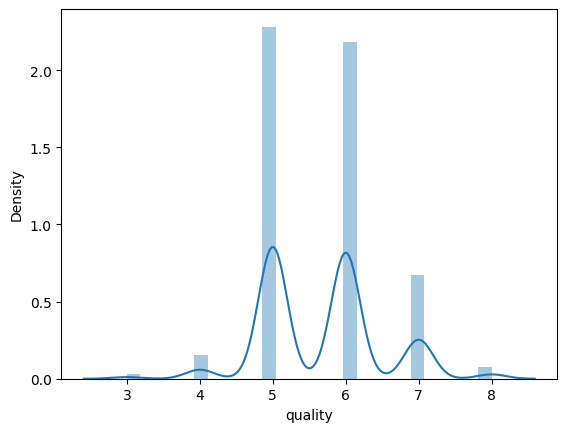

In [7]:
sns.distplot(dataframe.quality)

/tmp/ipython-input-4244311501.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.alcohol)


<Axes: xlabel='alcohol', ylabel='Density'>

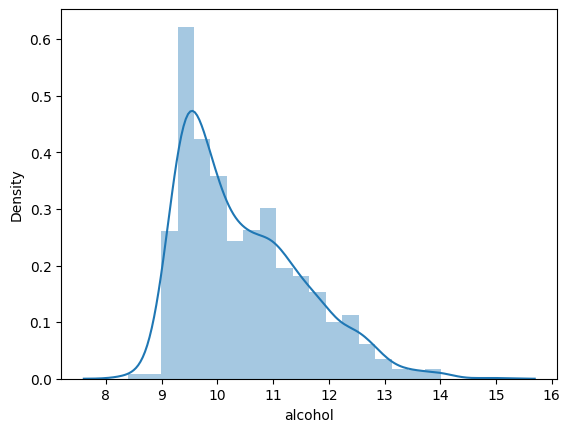

In [8]:
sns.distplot(dataframe.alcohol)

/tmp/ipython-input-2991950385.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.sulphates)


<Axes: xlabel='sulphates', ylabel='Density'>

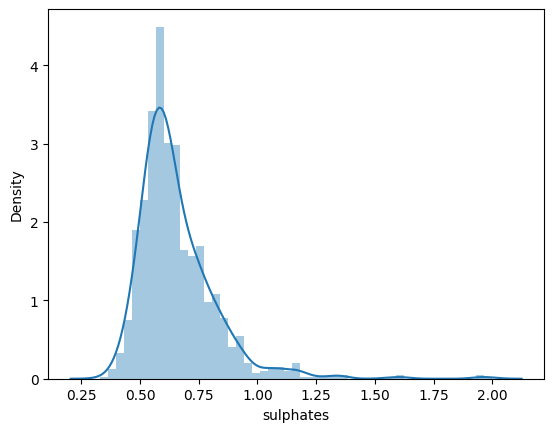

In [9]:
sns.distplot(dataframe.sulphates)

/tmp/ipython-input-2699779096.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.pH)


<Axes: xlabel='pH', ylabel='Density'>

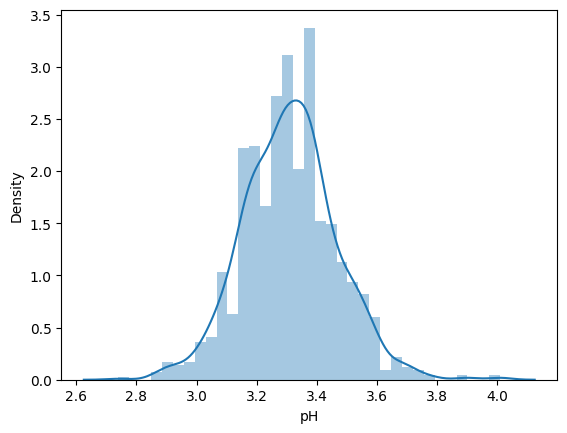

In [10]:
sns.distplot(dataframe.pH)

/tmp/ipython-input-3748519566.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.density)


<Axes: xlabel='density', ylabel='Density'>

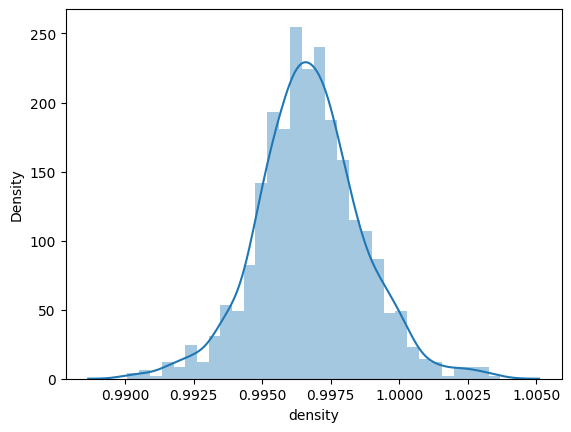

In [11]:
sns.distplot(dataframe.density)

/tmp/ipython-input-3216493023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['total sulfur dioxide'])


<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

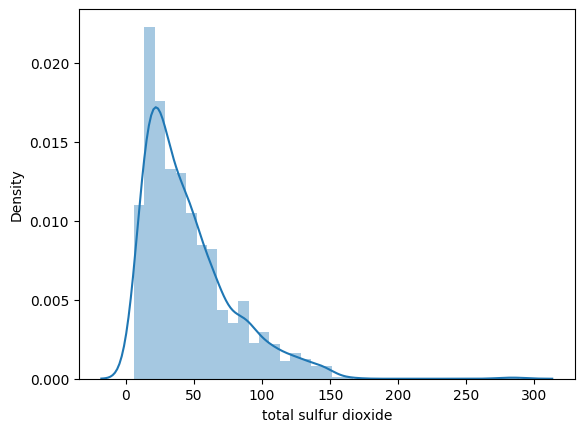

In [13]:
sns.distplot(dataframe['total sulfur dioxide'])

/tmp/ipython-input-668533715.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['free sulfur dioxide'])


<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

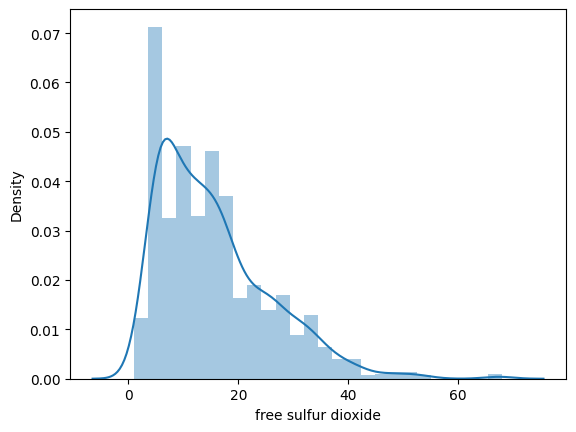

In [15]:
sns.distplot(dataframe['free sulfur dioxide'])

/tmp/ipython-input-2224237132.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.chlorides)


<Axes: xlabel='chlorides', ylabel='Density'>

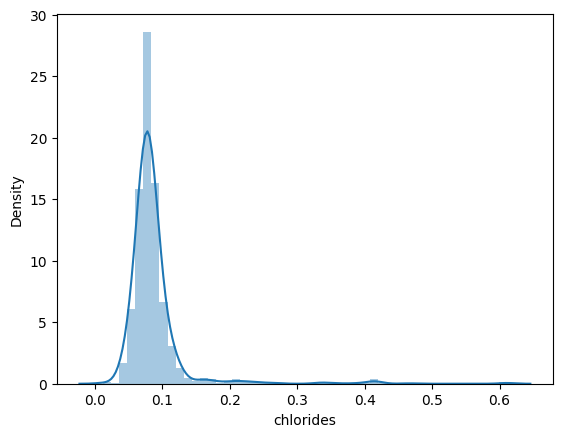

In [16]:
sns.distplot(dataframe.chlorides)

/tmp/ipython-input-1093111192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['residual sugar'])


<Axes: xlabel='residual sugar', ylabel='Density'>

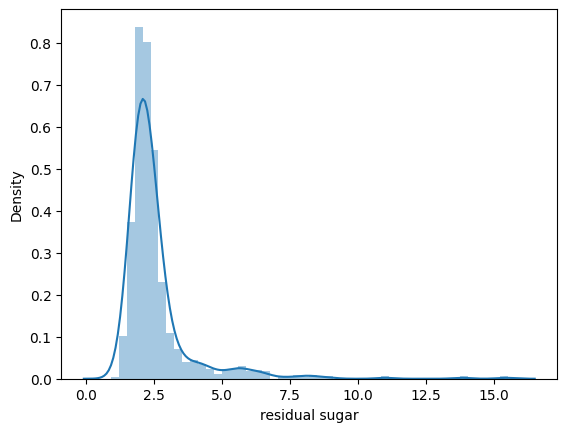

In [18]:
sns.distplot(dataframe['residual sugar'])

/tmp/ipython-input-1353866125.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['citric acid'])


<Axes: xlabel='citric acid', ylabel='Density'>

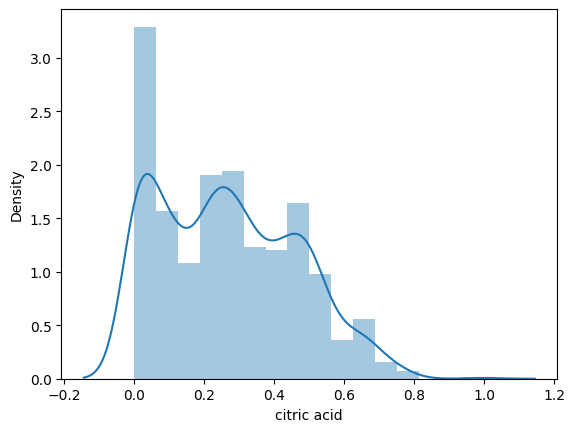

In [19]:
sns.distplot(dataframe['citric acid'])

/tmp/ipython-input-1230425937.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['volatile acidity'])


<Axes: xlabel='volatile acidity', ylabel='Density'>

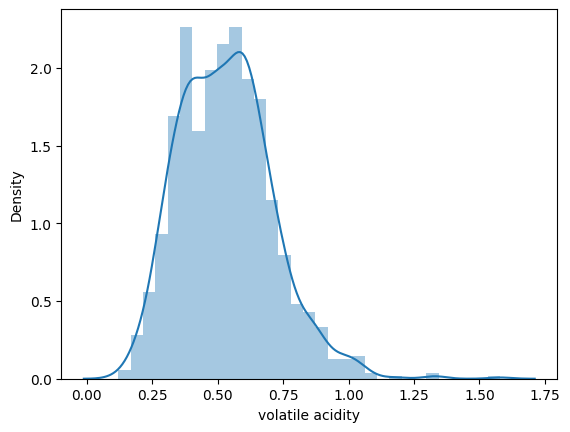

In [20]:
sns.distplot(dataframe['volatile acidity'])

/tmp/ipython-input-3538871692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['fixed acidity'])


<Axes: xlabel='fixed acidity', ylabel='Density'>

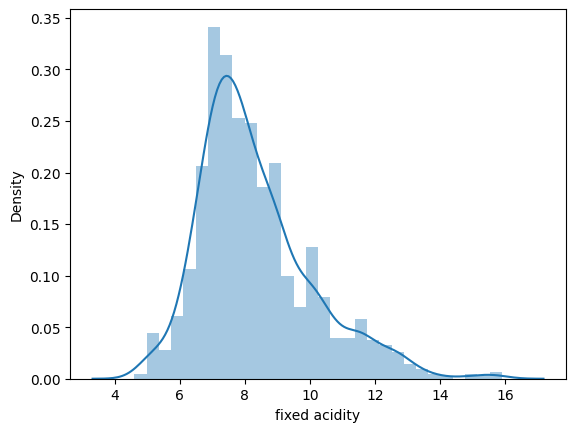

In [21]:
sns.distplot(dataframe['fixed acidity'])

In [23]:
dataframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [24]:
dataframe['quality'] = dataframe['quality'].replace(0, dataframe['quality'].mean())
dataframe['alcohol'] = dataframe['alcohol'].replace(0, dataframe['alcohol'].median())
dataframe['sulphates'] = dataframe['sulphates'].replace(0, dataframe['sulphates'].median())
dataframe['pH'] = dataframe['pH'].replace(0, dataframe['pH'].mean())
dataframe['density'] = dataframe['density'].replace(0, dataframe['density'].mean())
dataframe['total sulfur dioxide'] = dataframe['total sulfur dioxide'].replace(0, dataframe['total sulfur dioxide'].median())
dataframe['free sulfur dioxide'] = dataframe['free sulfur dioxide'].replace(0, dataframe['free sulfur dioxide'].median())
dataframe['chlorides'] = dataframe['chlorides'].replace(0, dataframe['chlorides'].median())
dataframe['residual sugar'] = dataframe['residual sugar'].replace(0, dataframe['residual sugar'].median())
dataframe['citric acid'] = dataframe['citric acid'].replace(0, dataframe['citric acid'].mean())
dataframe['volatile acidity'] = dataframe['volatile acidity'].replace(0, dataframe['volatile acidity'].mean())
dataframe['volatile acidity'] = dataframe['volatile acidity'].replace(0, dataframe['volatile acidity'].mean())


Train and split

In [25]:
X=dataframe.drop(columns='quality',axis=1)
y=dataframe['quality']


In [27]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y)

model training

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# fit model
model.fit(X_train, y_train)

DecisionTreeClassifier()

model prediction


In [29]:
y_pred = model.predict(X_test)

Model Interpretaion

[Text(0.3672532014525994, 0.9705882352941176, 'x[10] <= 9.85\ngini = 0.635\nsamples = 857\nvalue = [3, 20, 372, 343, 107, 12]'),
 Text(0.13685015290519878, 0.9117647058823529, 'x[9] <= 0.625\ngini = 0.45\nsamples = 342\nvalue = [2.0, 8.0, 237.0, 90.0, 5.0, 0.0]'),
 Text(0.2520516771788991, 0.9411764705882353, 'True  '),
 Text(0.05749235474006116, 0.8529411764705882, 'x[4] <= 0.184\ngini = 0.328\nsamples = 213\nvalue = [1, 5, 171, 35, 1, 0]'),
 Text(0.052599388379204894, 0.7941176470588235, 'x[1] <= 0.425\ngini = 0.308\nsamples = 209\nvalue = [1, 5, 171, 31, 1, 0]'),
 Text(0.029357798165137616, 0.7352941176470589, 'x[4] <= 0.08\ngini = 0.457\nsamples = 34\nvalue = [0, 0, 22, 12, 0, 0]'),
 Text(0.01712538226299694, 0.6764705882352942, 'x[6] <= 77.0\ngini = 0.426\nsamples = 13\nvalue = [0, 0, 4, 9, 0, 0]'),
 Text(0.012232415902140673, 0.6176470588235294, 'x[3] <= 1.65\ngini = 0.298\nsamples = 11\nvalue = [0, 0, 2, 9, 0, 0]'),
 Text(0.007339449541284404, 0.5588235294117647, 'gini = 0.0\nsa

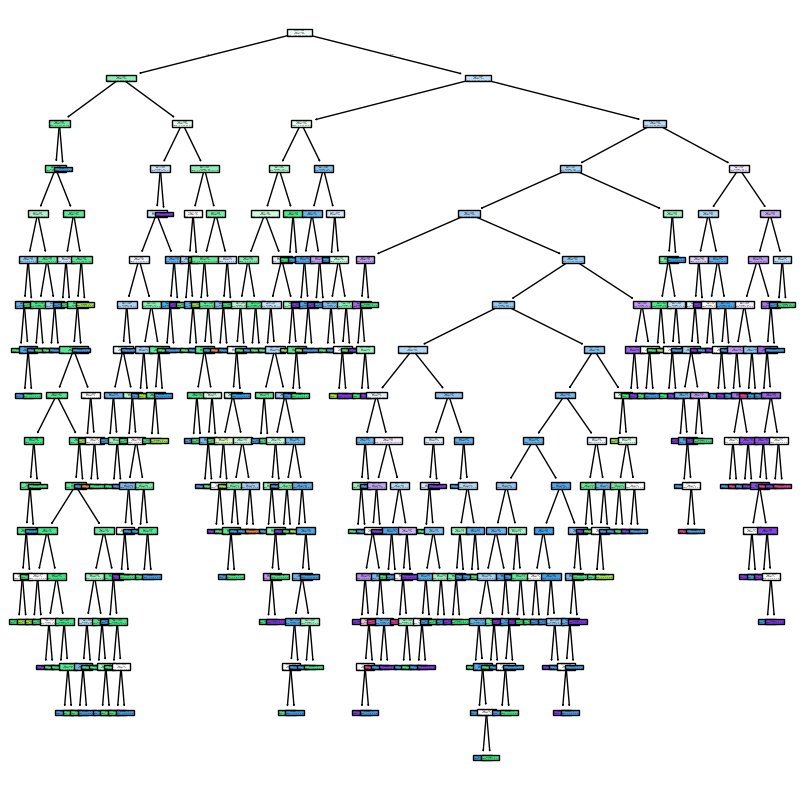

In [30]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)

Model testing on numbers so that it working fine or not

to test that every thing is working fine we will take 20 data to check it

In [34]:
sampledata = dataframe.head(20)

[Text(0.375, 0.9, 'x[1] <= 0.355\ngini = 0.465\nsamples = 20\nvalue = [14, 3, 3]'),
 Text(0.16666666666666666, 0.7, 'x[8] <= 3.23\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.2708333333333333, 0.8, 'True  '),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5833333333333334, 0.7, 'x[6] <= 22.0\ngini = 0.304\nsamples = 17\nvalue = [14, 1, 2]'),
 Text(0.4791666666666667, 0.8, '  False'),
 Text(0.4166666666666667, 0.5, 'x[8] <= 3.32\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.5, 'x[3] <= 2.35\ngini = 0.133\nsamples = 14\nvalue = [13, 1, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]'),
 Text(0.8333333333333334, 0.3, 'x[10] <= 9.75\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0

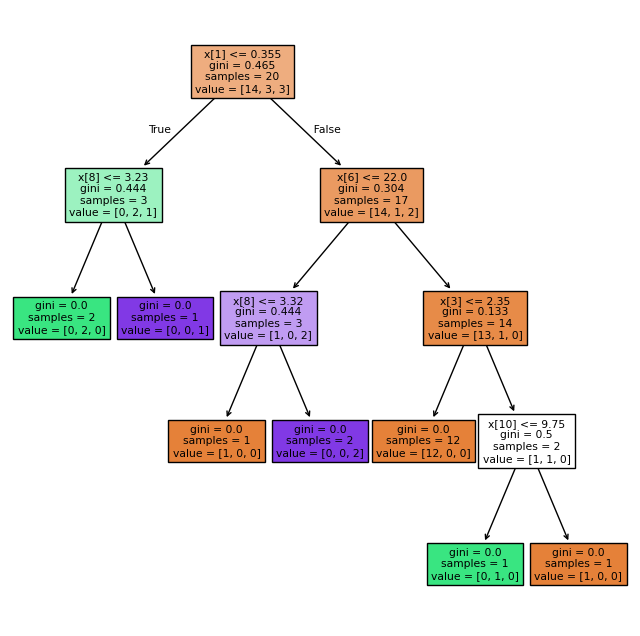

In [35]:
X_sample = sampledata.drop(columns="quality",axis=1)
y_sample = sampledata['quality']
sampleModel = DecisionTreeClassifier()
sampleModel.fit(X_sample,y_sample)
from sklearn import tree
plt.figure(figsize=(8,8))
tree.plot_tree(sampleModel,filled=True)

**BY defult gini parmeter**

i forget to do outlier detction and so it might have some outliers

In [37]:
set(sampledata.quality)

{5, 6, 7}

i want call confusion matrix

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.64      0.57      0.60       111
           6       0.58      0.61      0.60       119
           7       0.51      0.67      0.58        36
           8       0.00      0.00      0.00         4

    accuracy                           0.56       286
   macro avg       0.29      0.31      0.30       286
weighted avg       0.55      0.56      0.55       286



next time vist
*   outliers detection i have to do
*   and minimize outliers

